Mounting Google Drive to store the data in Google Drive

#1. Uploading the data to Google Colab

Google Colab provides free graphics processing unit (GPU) and Tensor Processing Unit (TPU) access, both of which can be crucial in executing python algorithms. The temporary external storage allows for a higher efficiency and productivity while reducing potential technical issues.  

In [ ]:
from google.colab import drive
drive.mount('/content/drive')


Mounted at /content/drive


Uploading the data to Google Collab

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving Qualitative_Data.csv to Qualitative_Data.csv


Importing libraries and Accessing the data

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming the uploaded file is named "data.csv"
df = pd.read_csv("data_cleaned.csv")


Saving the data to google drive

In [ ]:
import shutil

# Specify the path to the destination folder in Google Drive
destination_folder = '/content/drive/MyDrive/Colab Notebooks/'

# Move the uploaded files to the specified destination folder
for file_name in uploaded.keys():
    shutil.move(file_name, destination_folder + file_name)


NameError: ignored

#2. Feature Engineering

Feature engineering involves creating new features or modifying existing features which might improve the performance of the model and analysis. Some feature engineering has been done previously using SPSS. Many features were converted to numerical variables. For instance, Year 2016-17 was converted to 1 because it is the earliest year in the data.
Colleges, departments, Questions, Restrict, SurveyType, and FHEQLevel were all converted to numerical values. Please check the comment for specifics.

Adding a response rate feature can provide more insight

In [ ]:
df['ResponseRate'] = df['ModuleRespondents'] / df['ModulePopulation']

Creating new features for percentage of each type of response

In [ ]:
df['AgreePercentage'] = df['AgreeCount'] / df['ModuleRespondents']
df['DisagreePercentage'] = df['DisagreeCount'] / df['ModuleRespondents']
df['NAPercentage'] = df['NACount'] / df['ModuleRespondents']
df['NeutralPercentage'] = df['NeutralCount'] / df['ModuleRespondents']
df['BlankPercentage'] = df['BlankCount'] / df['ModuleRespondents']

In case the Module Respondents is 0, the output will be Not a Number (NAN). Thus, potential NaN outputs will be replaced by 0.

In [ ]:
df.fillna(0, inplace=True)


Creating the target variable

In [ ]:
# Calculate the 'SatisfactionScore' for each row in the dataframe
df['SatisfactionScore'] = df['AgreePercentage'] - df['DisagreePercentage']
# This should pose no problem since all questions are positively framed.

Removing the features used to create the features above to avoid multicollinearity

In [ ]:
df = df.drop(['ModuleRespondents', 'ModulePopulation', 'AgreeCount', 'DisagreeCount', 'NACount', 'NeutralCount', 'BlankCount', 'AgreePercentage', 'DisagreePercentage'], axis=1)


Checking the data again

In [ ]:
print(df.head())

   Year  Term ModuleCode  CFYModule                          ModuleName  \
0     3     1     CE5609          0  Mathematical Methods, Data and GIS   
1     3     2     CE5609          0  Mathematical Methods, Data and GIS   
2     3     1     CE5609          0  Mathematical Methods, Data and GIS   
3     3     2     CE5609          0  Mathematical Methods, Data and GIS   
4     2     2     CE5609          0  Mathematical Methods, Data and GIS   

   College  Department  Level  FHEQLevel  SurveyType  Restrict  Question  \
0        2           1      5          7           3         1         2   
1        2           1      5          7           3         2         2   
2        2           1      5          7           3         1         3   
3        2           1      5          7           3         2         1   
4        2           1      5          7           3         2         3   

   TotalResponseCount  TotalResponseCountexcl.BlanksNA  ResponseRate  \
0                   

# EDA

Using SPSS, previous EDA has been done to remove identifying columns for individuals. Discipline was also removed because department and college should suffice.

##Data Summary and Visualizations

In [ ]:
# Get summary statistics of numerical columns
print(df.describe())

               Year          Term     CFYModule       College    Department  \
count  34080.000000  34080.000000  34080.000000  34080.000000  34080.000000   
mean       3.912852      1.471039      0.010387      1.773768      7.261444   
std        2.076002      0.499168      0.101389      0.763999      3.469606   
min        1.000000      1.000000      0.000000      1.000000      1.000000   
25%        2.000000      1.000000      0.000000      1.000000      5.000000   
50%        4.000000      1.000000      0.000000      2.000000      7.000000   
75%        6.000000      2.000000      0.000000      2.000000     10.000000   
max        7.000000      2.000000      1.000000      3.000000     15.000000   

              Level     FHEQLevel    SurveyType      Restrict      Question  \
count  34080.000000  34080.000000  34080.000000  34080.000000  34080.000000   
mean       3.151761      5.738116      2.694806      1.907658      2.000000   
std        1.592489      1.286114      0.719146    

Checking for missing values

In [ ]:
df.isnull().sum()

Year                               0
Term                               0
ModuleCode                         0
CFYModule                          0
ModuleName                         0
College                            0
Department                         0
Level                              0
FHEQLevel                          0
SurveyType                         0
Restrict                           0
Question                           0
TotalResponseCount                 0
TotalResponseCountexcl.BlanksNA    0
ResponseRate                       0
NAPercentage                       0
NeutralPercentage                  0
BlankPercentage                    0
SatisfactionScore                  0
dtype: int64

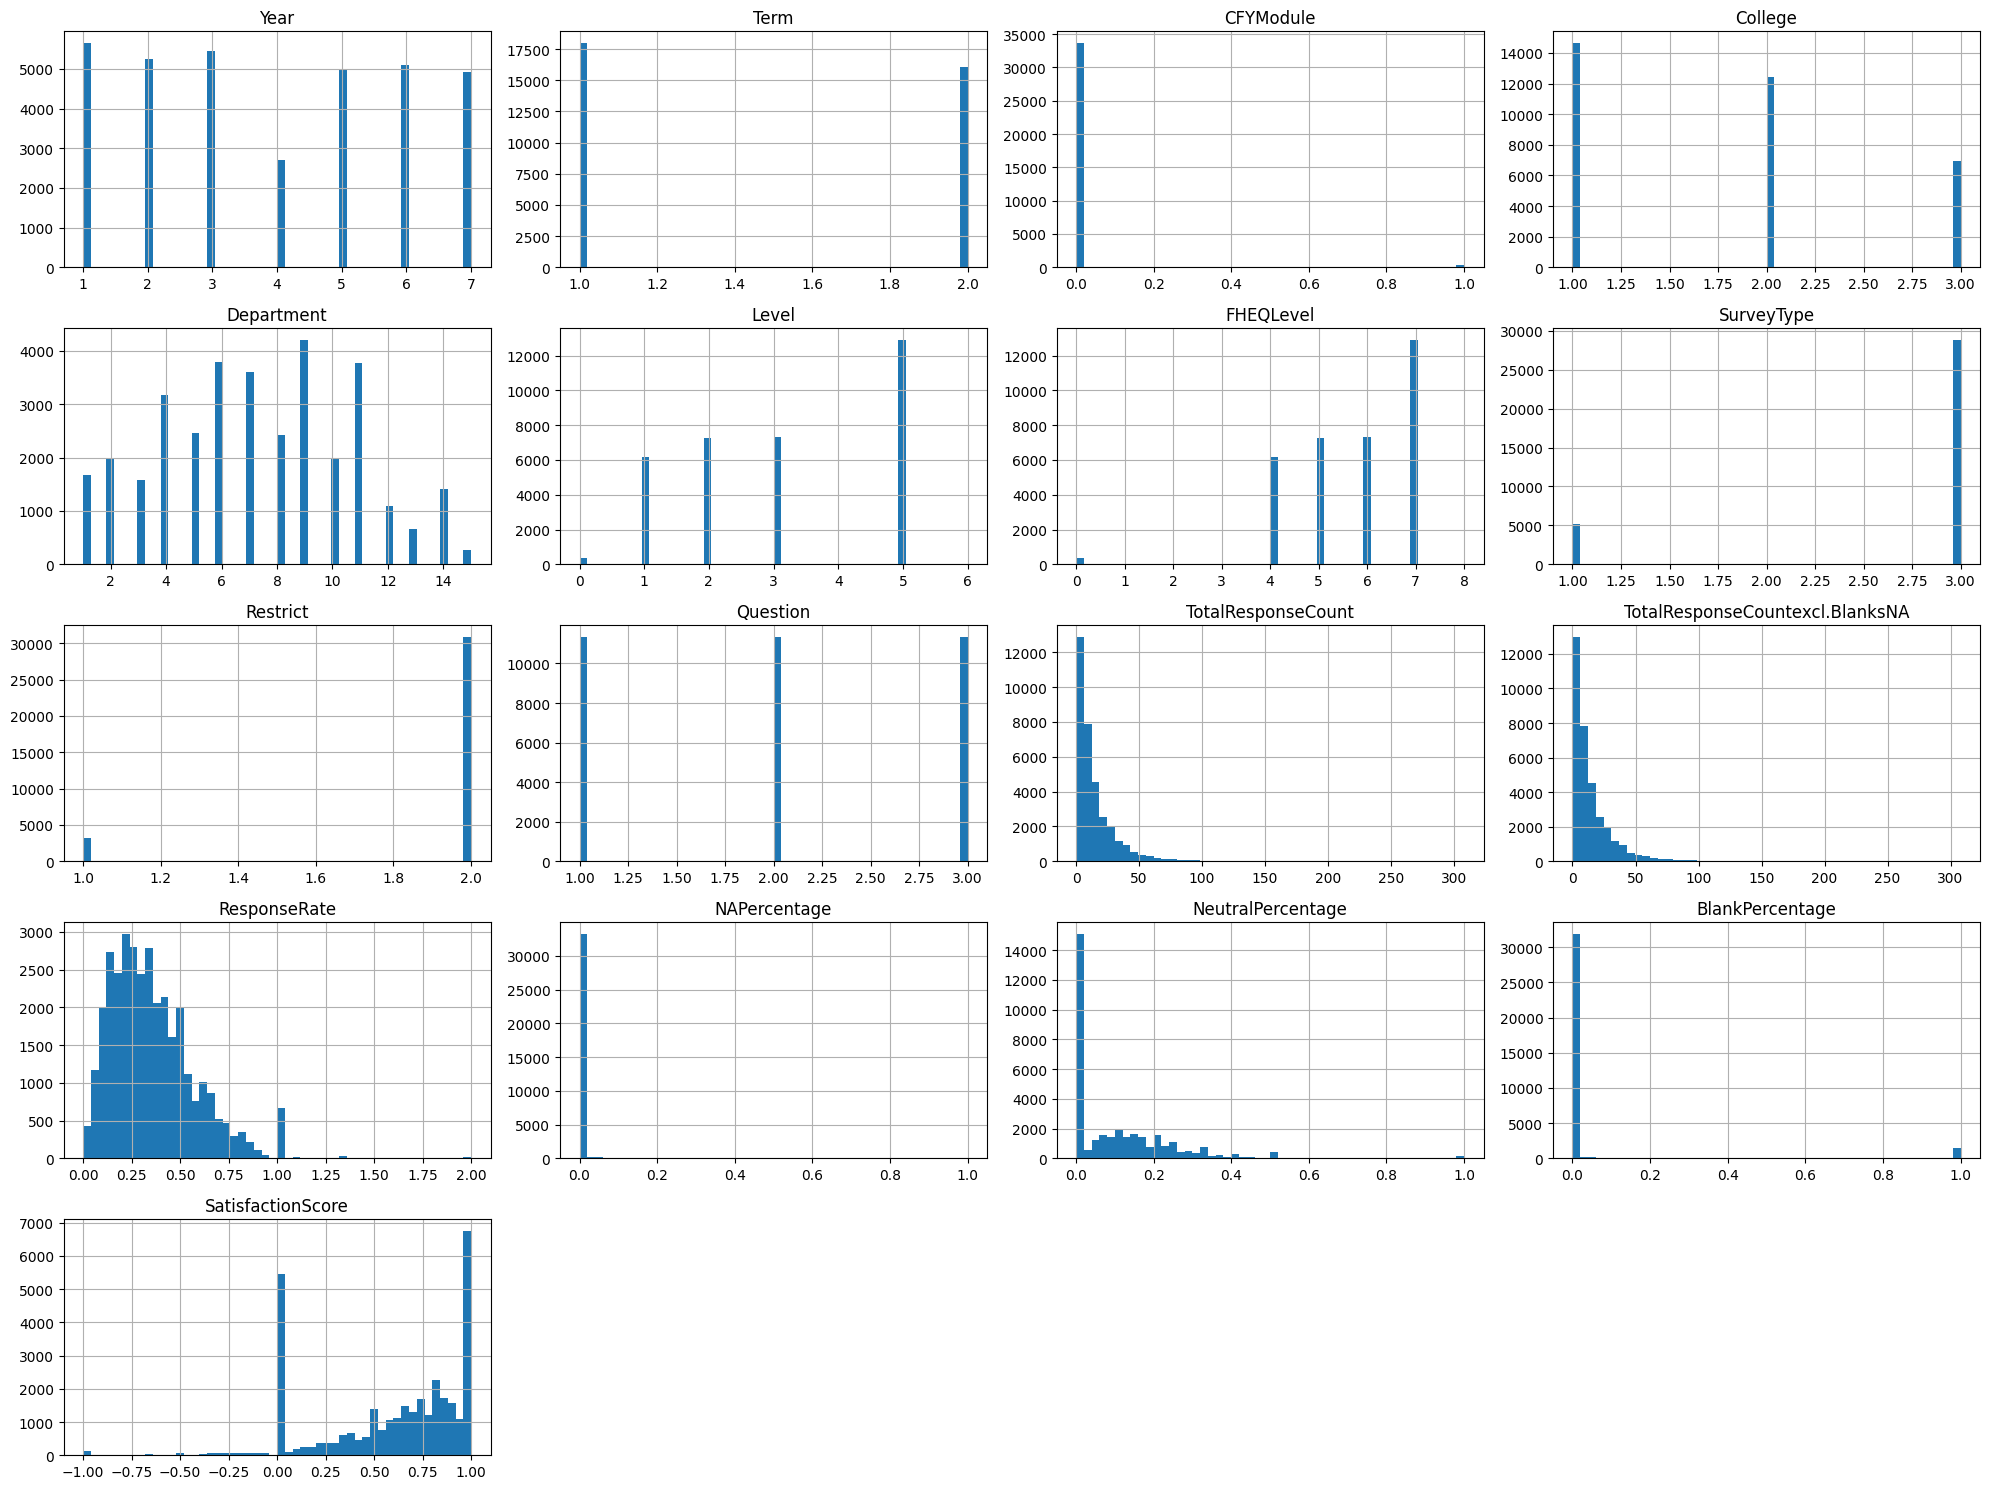

In [ ]:
#Visualizing distributions using histograms
df.hist(bins=50, figsize=(20,15))
plt.tight_layout()
plt.show(

<ipython-input-17-1fbeab4702dd>:2: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  correlation_matrix = df.corr()


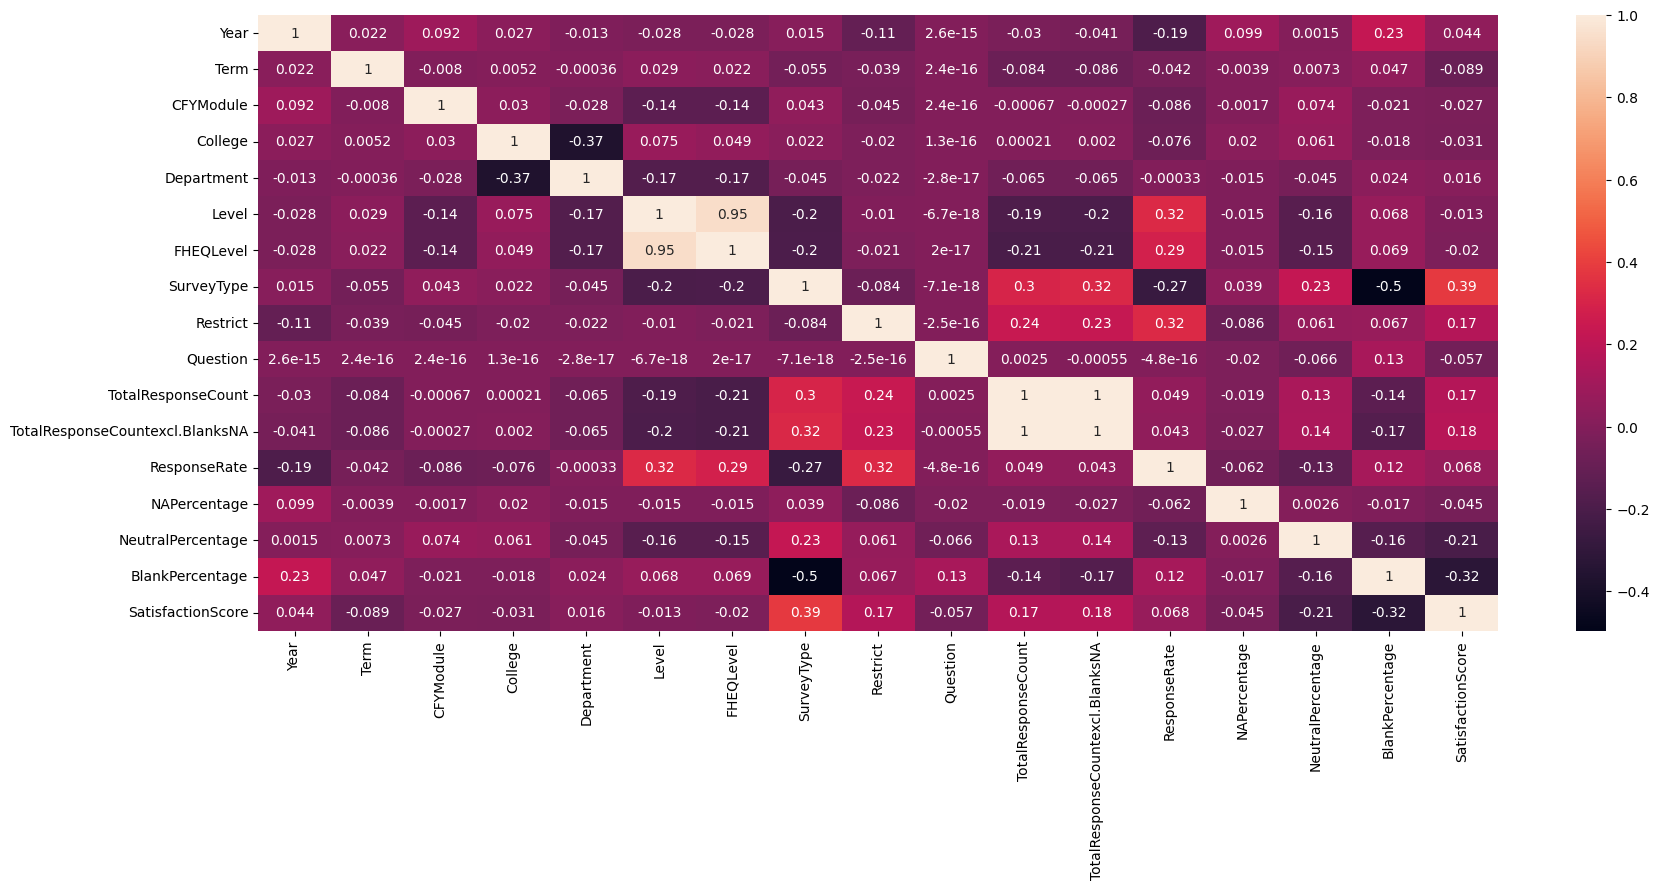

In [ ]:
#Correlation matrix to understand relationship between variables
correlation_matrix = df.corr()
plt.figure(figsize=(20, 8))
sns.heatmap(data=correlation_matrix, annot=True)
plt.show()

##Removing further features

Removing multicollinear variables

In [ ]:
df = df.drop('FHEQLevel', axis=1)


Removing module identification because it is categorical and has many options

In [ ]:
df = df.drop(['ModuleCode', 'ModuleName'], axis=1)

Removing irrelevant features. I do not value the information they provide.

In [ ]:
df = df.drop(['CFYModule', 'Restrict', 'SurveyType'], axis=1)

Removing for multicollinearity

In [ ]:
df = df.drop('TotalResponseCount', axis=1)

Further checking

In [ ]:
# Check if the dataframe has any NaN values
print(df.isnull().values.any())

# Check data types of features
print(df.dtypes)


False
Year                                 int64
Term                                 int64
College                              int64
Department                           int64
Level                                int64
Question                             int64
TotalResponseCountexcl.BlanksNA      int64
ResponseRate                       float64
NAPercentage                       float64
NeutralPercentage                  float64
BlankPercentage                    float64
SatisfactionScore                  float64
dtype: object


# Statistical Analysis and Hypothesis Testing

Creating a target variable to reflect the overall student satisfaction score of a survey. Note: Each instance is a survey in the data.

## Null Hypothesis 1: There is no significant difference in survey satisfaction based on the year of the course.
To answer, ANOVA test will be used.

In [ ]:
import scipy.stats as stats

# Hypothesis 1
F, p = stats.f_oneway(df[df['Year'] == 1]['SatisfactionScore'],
                      df[df['Year'] == 2]['SatisfactionScore'],
                      df[df['Year'] == 3]['SatisfactionScore'],
                      df[df['Year'] == 4]['SatisfactionScore'],
                      df[df['Year'] == 5]['SatisfactionScore'],
                      df[df['Year'] == 6]['SatisfactionScore'],
                      df[df['Year'] == 7]['SatisfactionScore'])
print('ANOVA test for Year:')
print('F =', F)
print('p =', p)

ANOVA test for Year:
F = 36.269086125797905
p = 4.684714531590368e-44


The null hypothesis is rejected due to the p-value being less than 0.05. Similarly, F value being much higher than 1 indicates there is variance among the different years, suggesting a high correlation between the year and the satisfaction score.

##Null Hypothesis 2: There is no significant correlation between SatisfactionScore and ResponseRate.
To answer, Pearson correlation test will be used.

In [ ]:
# Hypothesis 2
correlation, p = stats.pearsonr(df['SatisfactionScore'], df['ResponseRate'])
print('\nPearson correlation test between SatisfactionScore and ResponseRate:')
print('Correlation =', correlation)
print('p =', p)



Pearson correlation test between SatisfactionScore and ResponseRate:
Correlation = 0.06843672361205892
p = 1.1430374277739186e-36


There appears to be a minor positive correlation between the satisfaction score and the response rate.

The next step is to assess whether there is a difference in the course satisfaction before and during/after the pandemic. T1: 2016-2019 will be compared to T2: 2020-2023.

##Null Hypothesis 3: There is no significance in survey satisfaction before and after the pandemic outbreak.
To answer, t-test will be used.

In [ ]:
# Define the time periods
df['TimePeriod'] = df['Year'].apply(lambda x: '1-3' if x in [1, 2, 3] else '4-7')

In [ ]:
# Separate the SatisfactionScore for the two time periods
scores_period_1_3 = df[df['TimePeriod'] == '1-3']['SatisfactionScore']
scores_period_4_7 = df[df['TimePeriod'] == '4-7']['SatisfactionScore']
# Perform a t-test
t_stat, p_val = stats.ttest_ind(scores_period_1_3, scores_period_4_7)

print('T-statistic =', t_stat)
print('p =', p_val)

T-statistic = -10.413721884171913
p = 2.343316672787913e-25


The null hypothesis is rejected due to the p-value being less than 0.05. The T-statistic value is -10.4, indicating that the course satisfaction of students in 2016 to 2019 was significantly lower than in 2020 to 2023.

##Question type and satisfaction score.

To understand the relationship between the two variables, we need to first create a list for the satisfaction scores of each question. Then, a one-way ANOVA test will be used to determine whether a statistically significant difference exists between the questions.

In [ ]:
import scipy.stats as stats
# Create a list of satisfaction scores for each question type
satisfaction_scores = [df[df['Question'] == q_type]['SatisfactionScore'] for q_type in df['Question'].unique()]

F, p = stats.f_oneway(*satisfaction_scores)

print('ANOVA test for Question Type:')
print('F =', F)
print('p =', p)

ANOVA test for Question Type:
F = 83.09339569018967
p = 1.0016276694476721e-36


Based on the output, There seems to be a statistically significant difference between the satisfaction score and the question type.
The next step is to measure how much each question can predict the satisfaction score.
For this, a multiple regression model will be used.

In [ ]:
import statsmodels.api as sm
from statsmodels.formula.api import ols

# Create a model
model = ols('SatisfactionScore ~ C(Question)', data=df).fit()

# Print the summary
print(model.summary())


                            OLS Regression Results                            
Dep. Variable:      SatisfactionScore   R-squared:                       0.005
Model:                            OLS   Adj. R-squared:                  0.005
Method:                 Least Squares   F-statistic:                     83.09
Date:                Sat, 05 Aug 2023   Prob (F-statistic):           1.00e-36
Time:                        01:07:59   Log-Likelihood:                -15750.
No. Observations:               34080   AIC:                         3.151e+04
Df Residuals:                   34077   BIC:                         3.153e+04
Df Model:                           2                                         
Covariance Type:            nonrobust                                         
                       coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------------
Intercept            0.6250      0.004  

From these observations, it seems that all three aspects: self-perceived overall satisfaction with the course, effectiveness of teaching, and quality of learning materials and resources, respectively,  significantly influence online course satisfaction.

On the other hand, the question type explains the variance negligibly (R-squared 0.5%), indicating there are other significant factors that explain the satisfaction score.



##Null Hypothesis 4: There is no relationship between the department and the satisfaction score.

Department of Civil and Environmental Engineering 1
Department of Electronic and Electrical Engineering 2
Department of Economics and Finance 3
Department of Health Sciences 4
Brunel Business School 5
Department of Life Sciences 6
Department of Mechanical and Aerospace Engineering 7
Brunel Design School 8
Department of Social and Political Sciences 9
Brunel Law School 10
Department of Arts and Humanities 11
Department of Computer Science 12
Department of Education 13
Department of Mathematics 14
Department of Chemical Engineering 15


In [ ]:
# Fit the model
model = ols('SatisfactionScore ~ C(Department)', data=df).fit()

# Print the summary
print(model.summary())

                            OLS Regression Results                            
Dep. Variable:      SatisfactionScore   R-squared:                       0.023
Model:                            OLS   Adj. R-squared:                  0.023
Method:                 Least Squares   F-statistic:                     57.15
Date:                Sat, 05 Aug 2023   Prob (F-statistic):          9.36e-160
Time:                        01:08:00   Log-Likelihood:                -15437.
No. Observations:               34080   AIC:                         3.090e+04
Df Residuals:                   34065   BIC:                         3.103e+04
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                          coef    std err          t      P>|t|      [0.025      0.975]
---------------------------------------------------------------------------------------
Intercept               0.4696    

The output shows that the null hypothesis is rejected for most departments (p < 0.05) aside from department 7 and department 15. In other words, the satisfaction score of most departments differs from that of the department of civil and environmental engineering (1) aside from the department of mechanical and aerospace engineering (7) and chemical engineering (15).

###Bar Plot Visualization of the relationship between departments and satisfaction score using coefficients

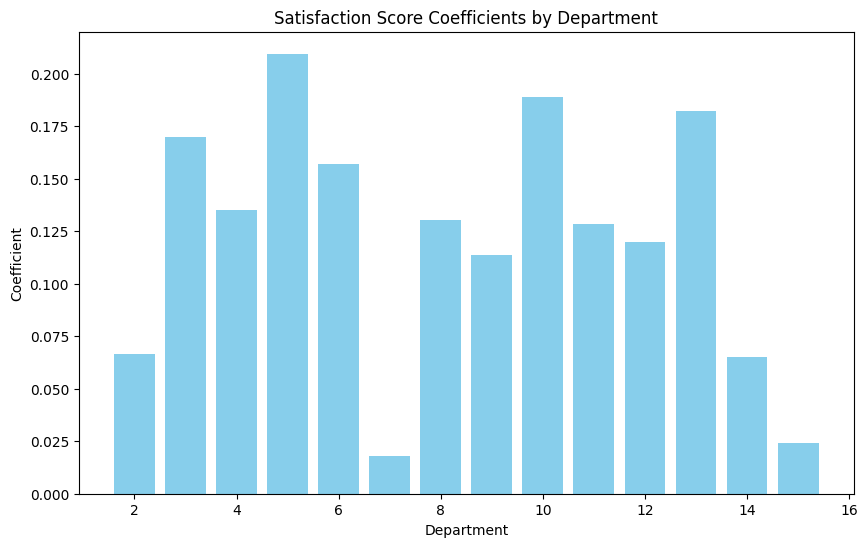

In [ ]:
# Store the department coefficients in a list
dept_coefs = [0.0664, 0.1699, 0.1350, 0.2095, 0.1572, 0.0178, 0.1302, 0.1139, 0.1888, 0.1282, 0.1197, 0.1821, 0.0651, 0.0243]

# Generate a list of department numbers from 2 to 15 (since Department 1 is the baseline and its coefficient is 0 by default)
departments = list(range(2, 16))

plt.figure(figsize=(10,6))
plt.bar(departments, dept_coefs, color='skyblue')
plt.xlabel('Department')
plt.ylabel('Coefficient')
plt.title('Satisfaction Score Coefficients by Department')
plt.show()


The regression coefficients depend on the choice of the reference category. In this case, it is department 1. A different reference department would change the coefficients for all the departments. Nonetheless, the relative rankings of the departments based on the coefficients should remain the same.

The online course satisfaction of a student in department 5 is approximately 20% higher than that of department 1 and 7.

### Average satisfaction score per department

Calculating the average satisfaction score for each department

In [ ]:
# Group by 'Department' and calculate the mean 'SatisfactionScore' for each department
average_satisfaction = df.groupby('Department')['SatisfactionScore'].mean()

# Convert the GroupBy object to a DataFrame
average_satisfaction = average_satisfaction.reset_index()

# Rename the columns for clarity
average_satisfaction.columns = ['Department', 'AverageSatisfactionScore']

# Sort the DataFrame by average satisfaction score in descending order
average_satisfaction = average_satisfaction.sort_values('AverageSatisfactionScore', ascending=False)

# Print the DataFrame
print(average_satisfaction)


    Department  AverageSatisfactionScore
4            5                  0.679109
9           10                  0.658407
12          13                  0.651768
2            3                  0.639518
5            6                  0.626847
3            4                  0.604590
7            8                  0.599848
10          11                  0.597859
11          12                  0.589351
8            9                  0.583542
1            2                  0.535995
13          14                  0.534736
14          15                  0.493949
6            7                  0.487434
0            1                  0.469634


Visualizing the average satisfaction score for each department

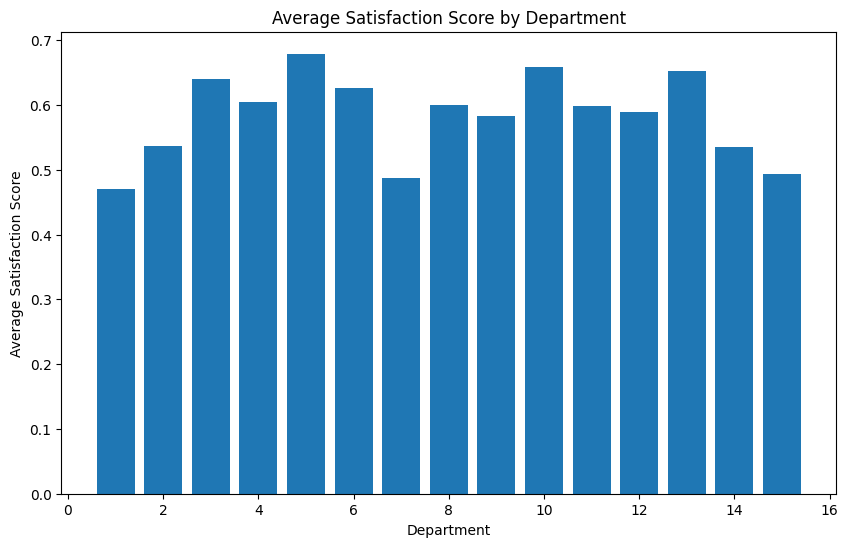

In [ ]:
import matplotlib.pyplot as plt

plt.figure(figsize=(10, 6))
plt.bar(average_satisfaction['Department'], average_satisfaction['AverageSatisfactionScore'])
plt.xlabel('Department')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Department')
plt.show()


This is an EDA step, but it should help to keep it near the coefficient visualization.

##Understanding the satisfaction score of each department before and after the pandemic outbreak

Group department and the two time periods of year. Then, calculate the average satisfaction score for each department of each time period.

In [ ]:
df['TimePeriod'] = df['Year'].apply(lambda x: '1' if x <= 3 else '2')

# Group by 'Department' and 'TimePeriod' and compute the mean satisfaction score.
grouped_df = df.groupby(['Department', 'TimePeriod'])['SatisfactionScore'].mean().reset_index()

# Pivot the data so we have one row per department and a column for each time period.
pivot_df = grouped_df.pivot(index='Department', columns='TimePeriod', values='SatisfactionScore')


Visualizing the data

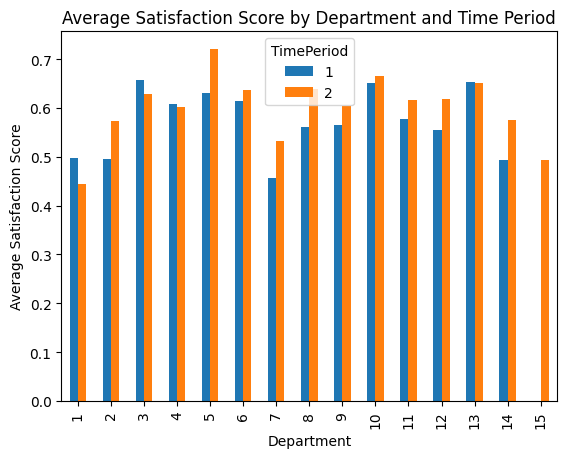

In [ ]:
pivot_df.plot(kind='bar')
plt.ylabel('Average Satisfaction Score')
plt.title('Average Satisfaction Score by Department and Time Period')
plt.show()


The average satisfaction score has increased for most departments. The exceptions are the Department of Civil and Environmental Engineering, the Department of Economics and Finance, and the Department of Health Sciences. Unfortunately, the Department of Chemical Engineering does not have results prior to the pandemic outbreak.

#Multiple Linear Regression to assess the most significant factors towards satisfaction score

###Checking for multicollinearity using variance inflation factor (VIF)

But first, removing the TimePeriod variable that was created recently to remove collinearity with Year and Term.

In [ ]:
df = df.drop('TimePeriod', axis=1)

NameError: ignored

In [ ]:
from statsmodels.stats.outliers_influence import variance_inflation_factor

# including all the numerical independent variables in the dataset
features = df[['Year', 'Department', 'TotalResponseCountexcl.BlanksNA', 'ResponseRate', 'NAPercentage', 'NeutralPercentage', 'BlankPercentage']]

# VIF dataframe
vif_data = pd.DataFrame()
vif_data["feature"] = features.columns

# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(features.values, i) for i in range(len(features.columns))]

print(vif_data)
from statsmodels.stats.outliers_influence import variance_inflation_factor


NameError: ignored

Removing columns based on the VIF values.

In [ ]:
df = df.drop(['College','Level', 'Term', 'Question'], axis=1)

Although question is important, the analysis in "Question type and satisfaction score" shows that there is a significant correlation between the type of question and the satisfaction score, but the question type only explains 0.5% of the variance in the target variable. Thus, it will be removed due to its high VIF value.

Checking for outliers

In [ ]:
from scipy.stats import zscore

# Apply the zscore function to the 'features' dataframe
features_zscore = features.apply(zscore)

# Any data point with a z-score > 3 or < -3 is considered an outlier.
outliers = features_zscore[(abs(features_zscore) > 3).any(axis=1)]

In [ ]:
outliers.shape

About 8% of the data is considered outliers, which is relatively small. Thus, since the data is comprised of surveys, in which each element is one survey, the outliers will not be removed or changed.

###Multiple Linear Regression 0.34

Importing libraries

In [ ]:
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LinearRegression
from sklearn import metrics


Separating the target variable

In [ ]:
X = df.drop('SatisfactionScore', axis=1)
y = df['SatisfactionScore']


Splitting 80/20

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


Adjusting and removing columns to fit the model

Training Linear Regression model

In [ ]:
model = LinearRegression()
model.fit(X_train, y_train)


LinearRegression()

Predictions

In [ ]:
y_pred = model.predict(X_test)


Prediction evaluation

In [ ]:
import numpy as np
print('Mean Absolute Error:', metrics.mean_absolute_error(y_test, y_pred))
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))
print('Root Mean Squared Error:', np.sqrt(metrics.mean_squared_error(y_test, y_pred)))


Mean Absolute Error: 0.26432583554392974
Mean Squared Error: 0.11545604252807375
Root Mean Squared Error: 0.33978823188579343


The MLR model is too weak. Reasons can include removing too many features, external factors affecting the target variable, or an error in the data analysis reasoning and implementation.

In [ ]:
print('R^2:', metrics.r2_score(y_test, y_pred))


R^2: 0.2210064121548907


This model only explains 22% of the variance in the data.

In [ ]:
df.head()

,Year,Department,TotalResponseCountexcl.BlanksNA,ResponseRate,NAPercentage,NeutralPercentage,BlankPercentage,SatisfactionScore
0,3,1,0,0.058824,0.0,0.0,0.0,0.0
1,3,1,4,0.250000,0.0,0.0,0.0,0.5
2,3,1,0,0.058824,0.0,0.0,0.0,0.0
3,3,1,4,0.250000,0.0,0.0,0.0,0.5
4,2,1,8,0.347826,0.0,0.0,0.0,1.0


# PCA

Importing the necessary libraries

In [ ]:
import numpy as np
from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler

Scaling the features. This is important to prevent the PCA from being affected by the scale of the variables.

In [ ]:
features = ['Year', 'Term', 'College', 'Department', 'Level', 'Question', 'TotalResponseCountexcl.BlanksNA', 'ResponseRate', 'NAPercentage', 'NeutralPercentage', 'BlankPercentage', 'TimePeriod']
x = df.loc[:, features].values
scaler = StandardScaler()
x = scaler.fit_transform(x)


Applying PCA

In [ ]:
pca = PCA()
principalComponents = pca.fit_transform(x)


Variance explained by the PCA

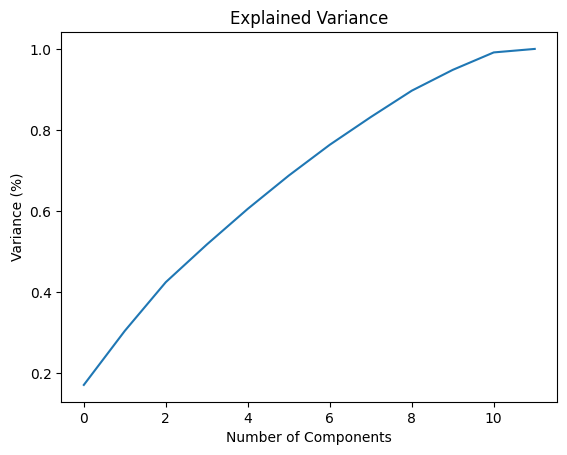

In [ ]:
plt.figure()
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('Number of Components')
plt.ylabel('Variance (%)')
plt.title('Explained Variance')
plt.show()


#Feature Selection

Correlation Matrix

<ipython-input-39-4dc0d3ed0440>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


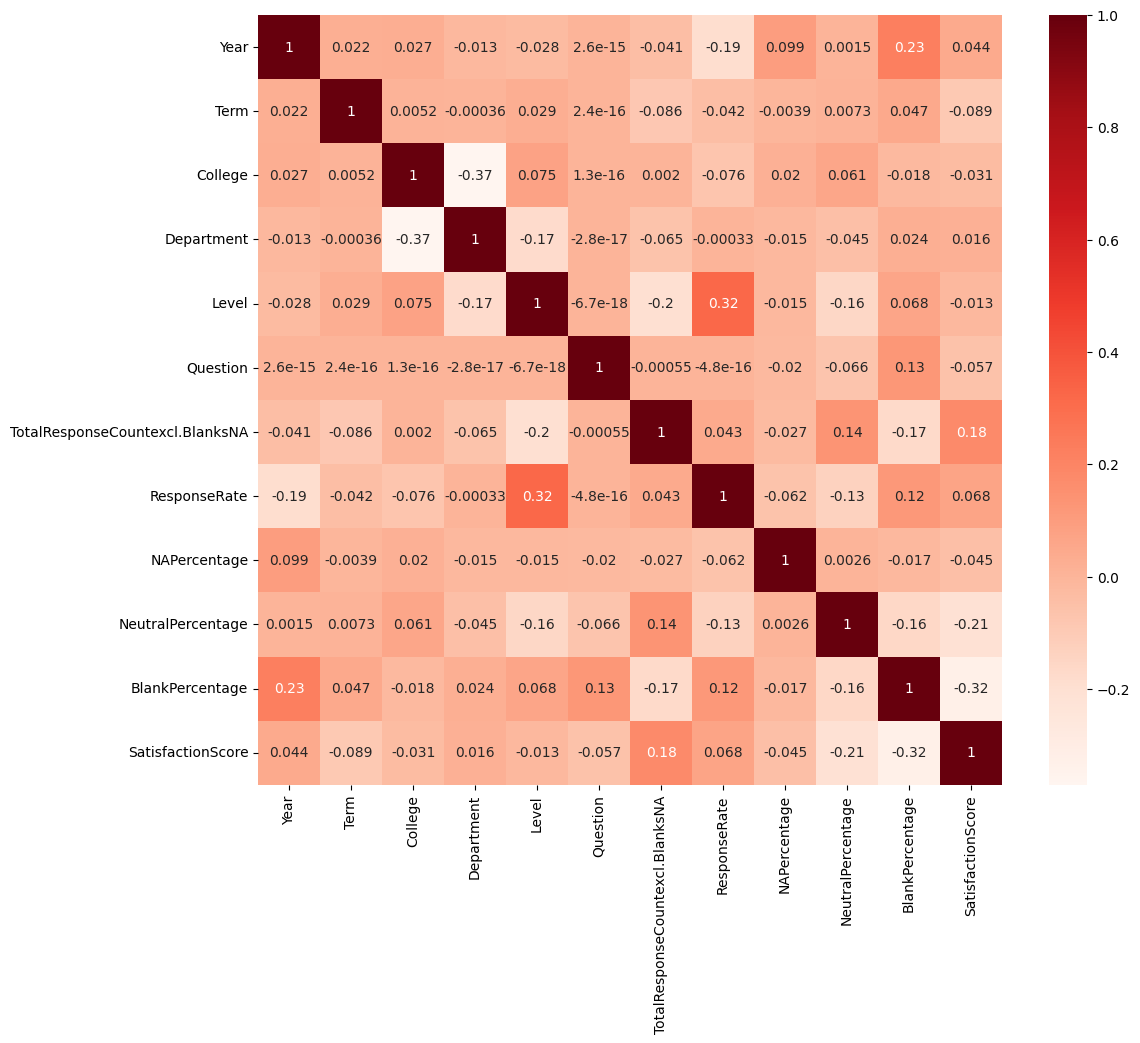

In [ ]:
corr = df.corr()
plt.figure(figsize=(12, 10))
sns.heatmap(corr, annot=True, cmap=plt.cm.Reds)
plt.show()


Univariate Selection: Statistical tests can be used to select those features that have the strongest relationship with the output variable. The scikit-learn library provides the SelectKBest class that can be used with a suite of different statistical tests to select a specific number of features.

##Feature Importance

In [ ]:
from sklearn.feature_selection import SelectKBest
from sklearn.feature_selection import f_regression

X = df[features]  #independent columns
y = df['SatisfactionScore']    #target column

#apply SelectKBest class to extract top 10 best features
bestfeatures = SelectKBest(score_func=f_regression, k=10)
fit = bestfeatures.fit(X,y)
dfscores = pd.DataFrame(fit.scores_)
dfcolumns = pd.DataFrame(X.columns)

#concat two dataframes for better visualization
featureScores = pd.concat([dfcolumns,dfscores],axis=1)
featureScores.columns = ['Specs','Score']  #naming the dataframe columns
print(featureScores.nlargest(10,'Score'))  #print 10 best features


                              Specs        Score
10                  BlankPercentage  3968.496587
9                 NeutralPercentage  1567.356155
6   TotalResponseCountexcl.BlanksNA  1110.903262
1                              Term   270.989481
7                      ResponseRate   160.358266
5                          Question   112.488242
11                       TimePeriod   108.445603
8                      NAPercentage    70.347197
0                              Year    67.111409
2                           College    33.060001


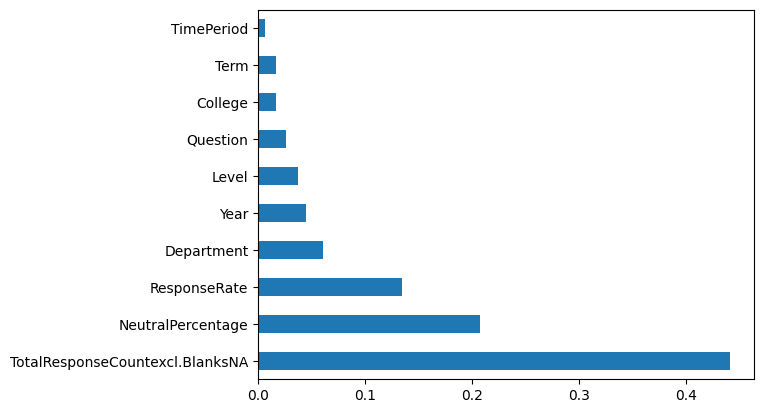

In [ ]:
from sklearn.ensemble import RandomForestRegressor

model = RandomForestRegressor()
model.fit(X,y)

feat_importances = pd.Series(model.feature_importances_, index=X.columns)
feat_importances.nlargest(10).plot(kind='barh')
plt.show()


The satisfaction score was calculated using the agreepercentage - disagreepercentage. This is posing a problem in that features of most importance are the total response count, neutral percentage, and response rate. The rest of the features (year, department, level, question, etc.) explain a negligible amount of the satisfaction score in comparison.

### Ordinal encoding
For categorical variables. Year 1 is not less than year 2, but the model may assume so. Therefore, ordinal encoding will be done to ensure they are weighted the same.

In [ ]:
from sklearn.preprocessing import OrdinalEncoder

# Define categorical columns
categorical_cols = ['Year', 'Term', 'College', 'Department', 'Level', 'Question', 'TimePeriod']

# Instantiate the OrdinalEncoder
encoder = OrdinalEncoder()

# Apply the encoder to the DataFrame:
df[categorical_cols] = encoder.fit_transform(df[categorical_cols])


##RF (RMSE 0.23)

In [ ]:
from sklearn.model_selection import train_test_split

# Define features and target
X = df.drop('SatisfactionScore', axis=1)
y = df['SatisfactionScore']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)


In [ ]:
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error

# Instantiate the model
model = RandomForestRegressor(n_estimators=100, random_state=42)

# Fit the model
model.fit(X_train, y_train)

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)


Root Mean Squared Error: 0.23436005147103678


##Neural Network 0.254

Normalizing data

In [ ]:
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from keras.models import Sequential
from keras.layers import Dense

# Define features and target
X = df.drop('SatisfactionScore', axis=1)
y = df['SatisfactionScore']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

# Normalize the data
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


Defining NN architecture

In [ ]:
model = Sequential()
model.add(Dense(10, input_dim=X_train.shape[1], activation='relu')) # input layer and first hidden layer
model.add(Dense(10, activation='relu')) # second hidden layer
model.add(Dense(1)) # output layer


Building the model

In [ ]:
model.compile(loss='mean_squared_error', optimizer='adam')

history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=50, batch_size=10)


Epoch 1/50
2386/2386 [==============================] - 7s 3ms/step - loss: 0.1363 - val_loss: 0.0972
Epoch 2/50
2386/2386 [==============================] - 5s 2ms/step - loss: 0.0869 - val_loss: 0.0799
Epoch 3/50
2386/2386 [==============================] - 5s 2ms/step - loss: 0.0754 - val_loss: 0.0713
Epoch 4/50
2386/2386 [==============================] - 6s 3ms/step - loss: 0.0712 - val_loss: 0.0705
Epoch 5/50
2386/2386 [==============================] - 5s 2ms/step - loss: 0.0692 - val_loss: 0.0683
Epoch 6/50
2386/2386 [==============================] - 6s 3ms/step - loss: 0.0682 - val_loss: 0.0664
Epoch 7/50
2386/2386 [==============================] - 5s 2ms/step - loss: 0.0675 - val_loss: 0.0663
Epoch 8/50
2386/2386 [==============================] - 5s 2ms/step - loss: 0.0670 - val_loss: 0.0654
Epoch 9/50
2386/2386 [==============================] - 6s 3ms/step - loss: 0.0666 - val_loss: 0.0660
Epoch 10/50
2386/2386 [==============================] - 5s 2ms/step - loss: 0.066

Evaluating the model

In [ ]:
from sklearn.metrics import mean_squared_error

# Make predictions
y_pred = model.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
rmse = np.sqrt(mse)

print('Root Mean Squared Error:', rmse)


320/320 [==============================] - 1s 1ms/step
Root Mean Squared Error: 0.2541047025761114


RMSE is 0.254. This value is relatively high for my data. Will try to optimize hyperparameters

##Grid Search to find the best hyperparameters.
Keras regression will be used because SatisfactionScore, the target variable we aim to predict, is numerical.

In [ ]:
!pip install scikeras


In [ ]:
from scikeras.wrappers import KerasRegressor
from sklearn.model_selection import GridSearchCV
from tensorflow.keras.optimizers import SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam

def create_model(optimizer=Adam):
    model = Sequential()
    model.add(Dense(10, input_dim=X_train.shape[1], activation='relu'))
    model.add(Dense(10, activation='relu'))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer=optimizer())
    return model

model = KerasRegressor(model=create_model, verbose=0)

optimizers = [SGD, RMSprop, Adagrad, Adadelta, Adam, Adamax, Nadam]

param_grid = {'batch_size': [10, 20, 30, 40],
              'epochs': [10, 50, 100],
              'optimizer': optimizers}

grid = GridSearchCV(estimator=model, param_grid=param_grid, n_jobs=-1)
grid_result = grid.fit(X_train, y_train)

# summarize results
print("Best: %f using %s" % (grid_result.best_score_, grid_result.best_params_))
means = grid_result.cv_results_['mean_test_score']
stds = grid_result.cv_results_['std_test_score']
params = grid_result.cv_results_['params']
for mean, stdev, param in zip(means, stds, params):
    print("%f (%f) with: %r" % (mean, stdev, param))


# Limitations
One encountered issue was including a time variable that takes in two values: 1 and 2, before the pandemic and after the pandemic, respectively. However, despite the one-hot encoding method, the variable could not be included in the VIF for the multiple linear regression. Thus, it had to be dropped and replaced by the original variables: Year and Term. Due to the data containing surveys as instances, building a model has proven to be difficult. The model would assess the satisfaction score of a survey. This is not the desirable model, which is to predict the satisfaction of a student and determine the predictors that increase or decrease whether a student is satisfied or not. This problem can be demonstrated by ranking the importance of features.